In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Fall 2022/Time Series Data Mining/Project"

Mounted at /content/drive
/content/drive/MyDrive/Fall 2022/Time Series Data Mining/Project


#### **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
from sklearn.compose import ColumnTransformer
from google.colab import files
from matplotlib.pyplot import figure

import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

## **Covid Cases & Deaths**

In [ ]:
df = pd.read_csv('covid.csv')
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,02/12/2021,UT,359641,359641.0,0.0,1060,0.0,1785,1729.0,56.0,11,2.0,02/13/2021 02:50:08 PM,Agree,Agree
2,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
3,12/06/2021,MP,1104,1104.0,0.0,0,0.0,5,5.0,0.0,2,0.0,12/08/2021 12:00:00 AM,Agree,Agree
4,05/09/2021,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,05/10/2021 02:15:36 PM,NaN,NaN


In [ ]:
df['submission_date'] = pd.to_datetime(df['submission_date'])
df = df.sort_values(by=['submission_date'], ascending=True)

In [ ]:
new_cases_by_state = df.groupby(by='state')['new_case'].sum().reset_index(name ='NewCases')
new_death_by_state = df.groupby(by='state')['new_death'].sum().reset_index(name ='NewDeath')

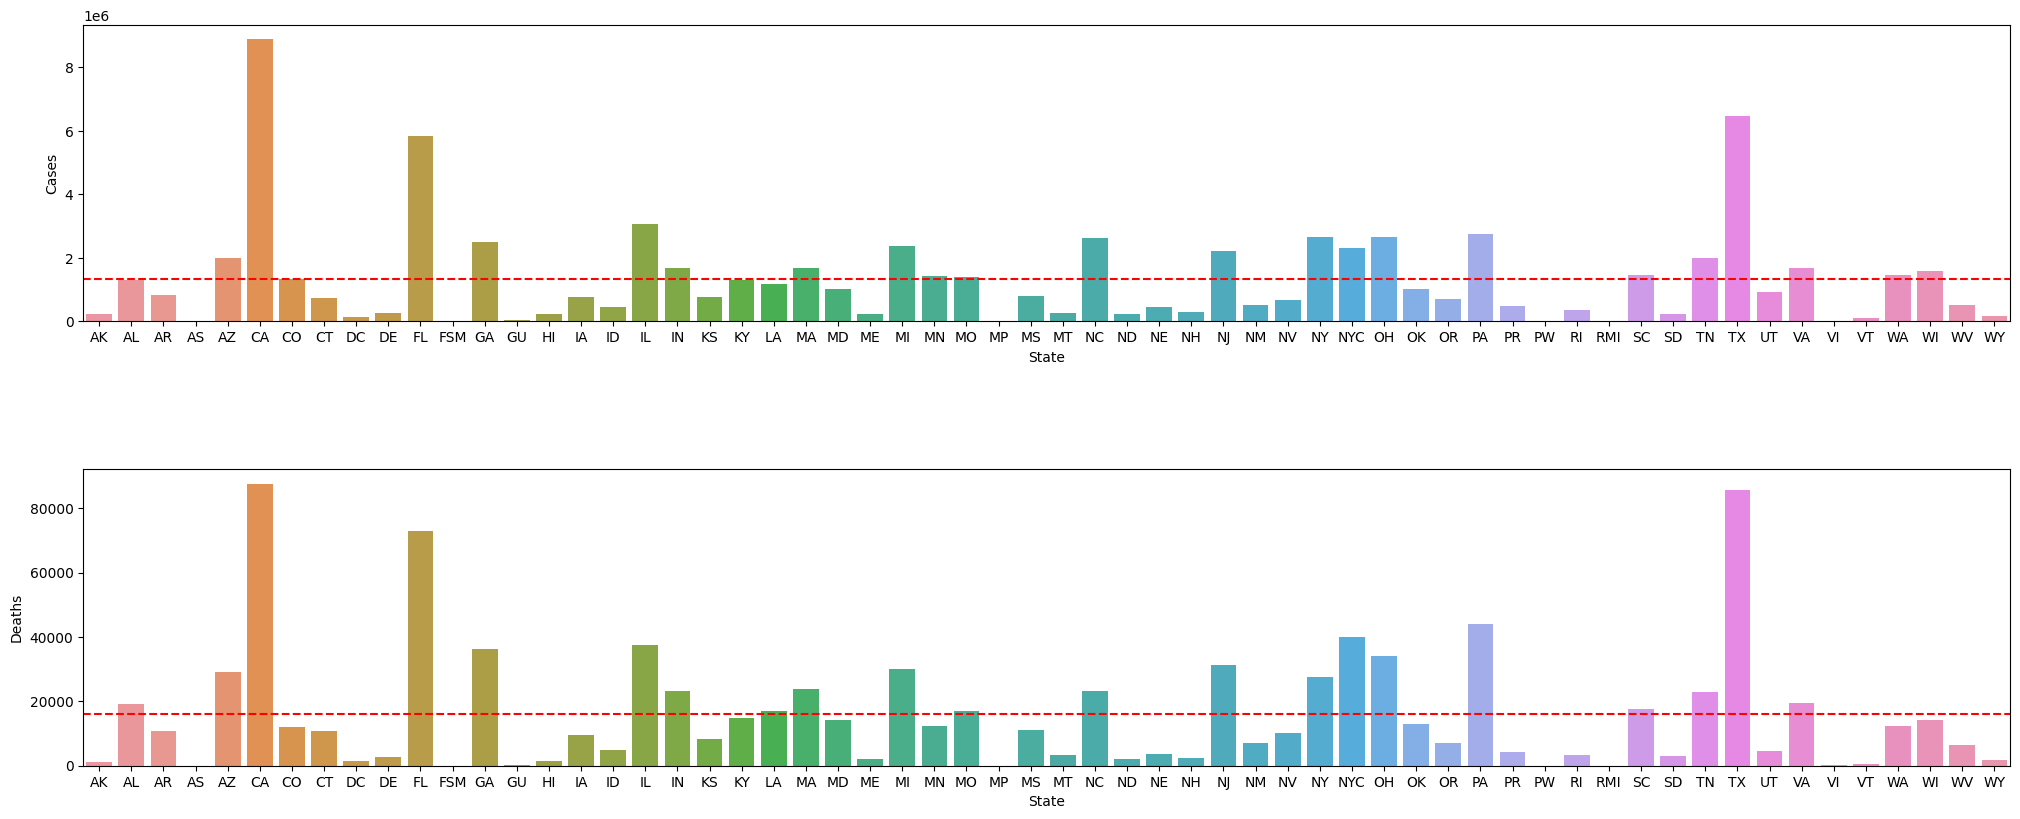

In [ ]:
yM = np.mean(new_cases_by_state['NewCases'])
yD = np.mean(new_death_by_state['NewDeath'])

fig, ax = plt.subplots(2, 1, figsize=(20,8))
fig.tight_layout()

ax = plt.subplot(2,1,1)
ax = sns.barplot(x="state", y="NewCases", data=new_cases_by_state)
plt.axhline(y = yM, color = 'r', linestyle = 'dashed') 
plt.xlabel('State')
plt.ylabel('Cases')

ax = plt.subplot(2,1,2)
ax = sns.barplot(x="state", y="NewDeath", data=new_death_by_state)
plt.axhline(y = yD, color = 'r', linestyle = 'dashed') 
plt.xlabel('State')
plt.ylabel('Deaths')

plt.subplots_adjust(hspace=0.5)
 
plt.show()

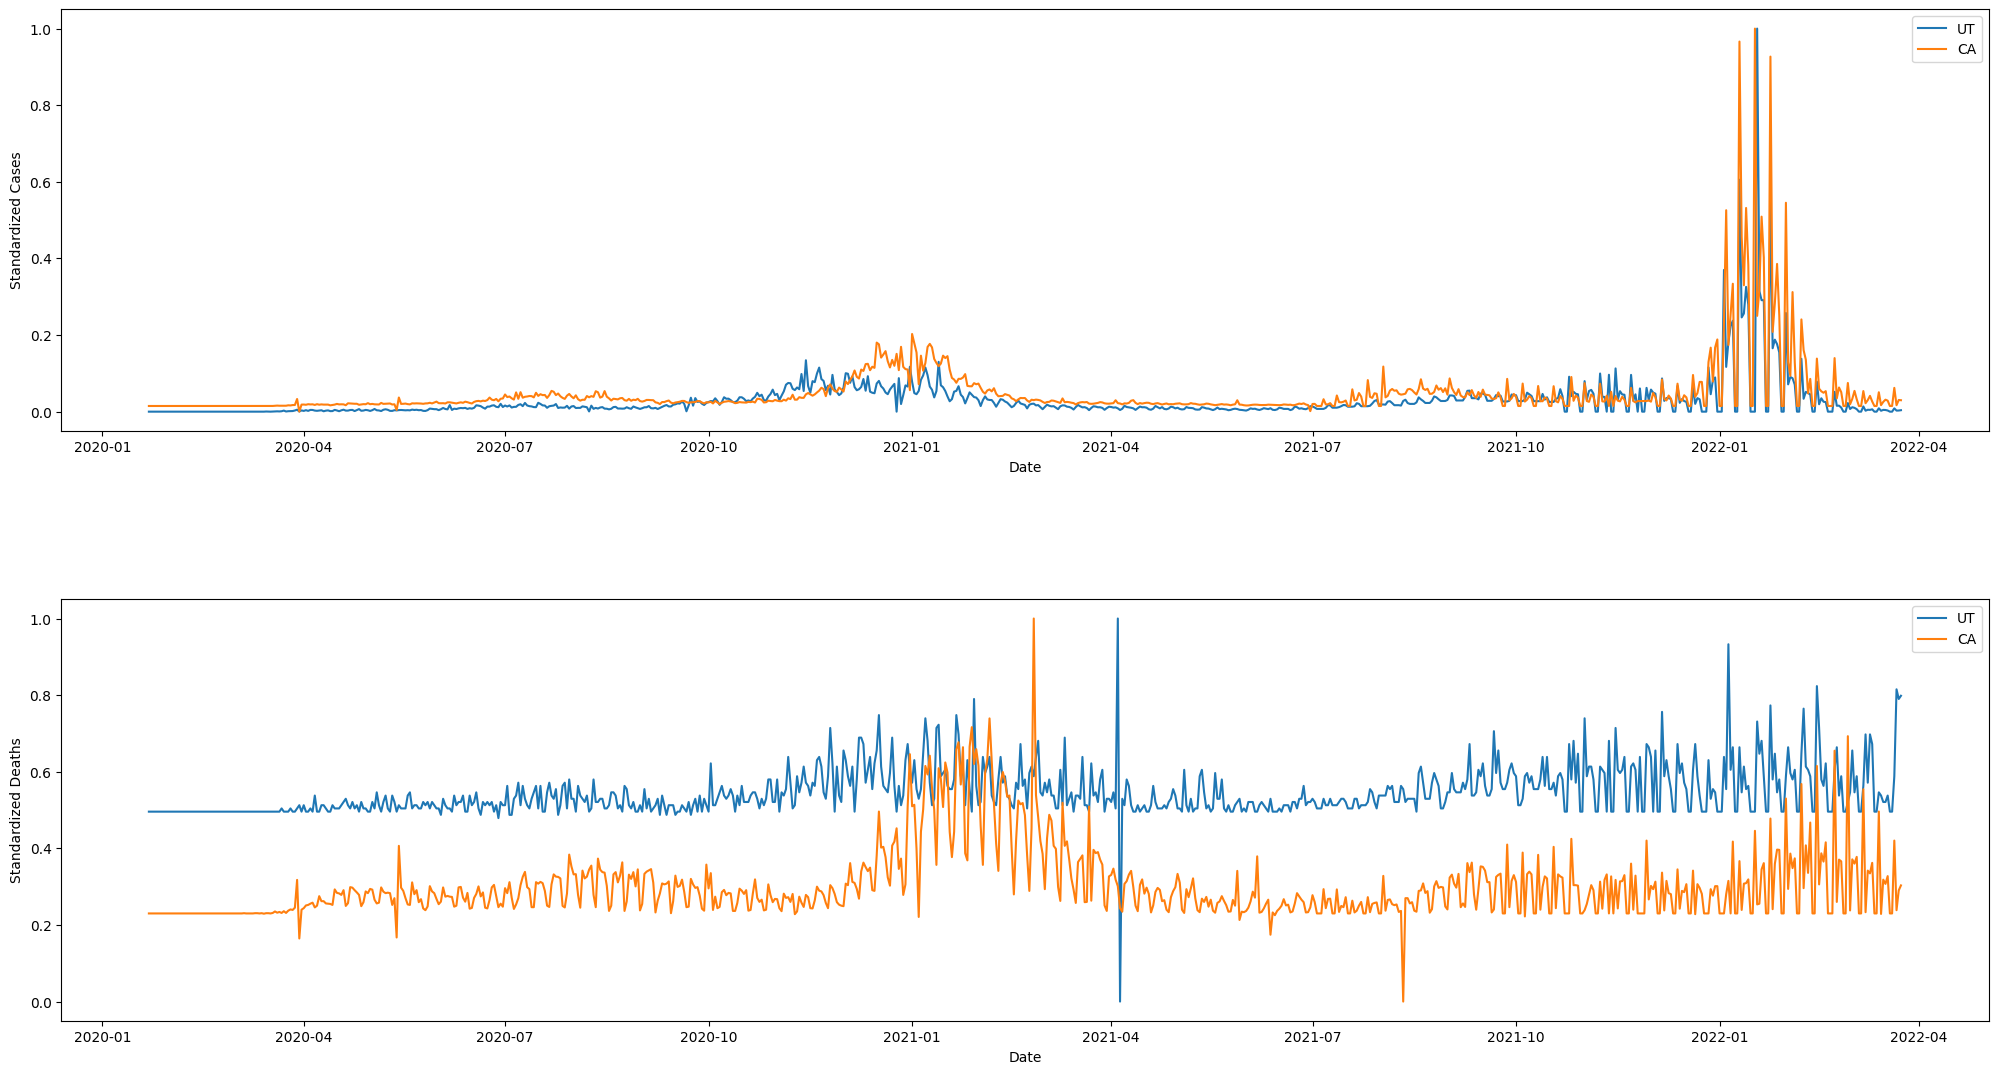

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,7))
fig.tight_layout()

ax = plt.subplot(2,1,1)
df1 = df.copy()

ct = ColumnTransformer([
        ('somename', MinMaxScaler(), ['new_case'])
    ], remainder='passthrough')

temp = df1
df1['new_case'] = ct.fit_transform(temp)[:,0]
selected_state = ['UT', 'CA']
for i in selected_state:

  cases_per_state = df1[df1['state'] == i]
  cases_per_state = cases_per_state[['state','submission_date','new_case']]
  cases_per_state['new_case'] = MinMaxScaler().fit_transform(np.array(cases_per_state['new_case']).reshape(-1,1))
  plt.plot(cases_per_state['submission_date'],cases_per_state['new_case'], label=i)
plt.xlabel('Date')
plt.ylabel('Standardized Cases')
plt.legend()

ax = plt.subplot(2,1,2)
ct = ColumnTransformer([
        ('somename', MinMaxScaler(), ['new_death'])
    ], remainder='passthrough')

temp = df1
df1['new_death'] = ct.fit_transform(temp)[:,0]

selected_state = ['UT', 'CA']
for i in selected_state:

  cases_per_state = df1[df1['state'] == i]
  cases_per_state = cases_per_state[['state','submission_date','new_death']]
  cases_per_state['new_death'] = MinMaxScaler().fit_transform(np.array(cases_per_state['new_death']).reshape(-1,1))
  plt.plot(cases_per_state['submission_date'],cases_per_state['new_death'], label=i)
plt.xlabel('Date')
plt.ylabel('Standardized Deaths')
plt.legend()

plt.subplots_adjust(top=1.5, 
                    hspace=0.4)

plt.show()

## **Covid Vaccination**

In [ ]:
vaccine = pd.read_csv('us_state_vaccinations.csv')
vaccine['date'] = pd.to_datetime(vaccine['date'])
vaccine = vaccine.sort_values(by=['date'], ascending=True)
vaccine.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
23867,2020-12-20,United States,556208.0,NaN,NaN,NaN,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23868,2020-12-21,United States,614117.0,NaN,NaN,NaN,0.18,NaN,NaN,NaN,57909.0,57909.0,174.0,NaN,NaN,NaN
23869,2020-12-22,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127432.0,384.0,NaN,NaN,NaN
23870,2020-12-23,United States,1008025.0,NaN,NaN,NaN,0.30,NaN,NaN,NaN,NaN,150606.0,454.0,NaN,NaN,NaN
23871,2020-12-24,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191001.0,575.0,NaN,NaN,NaN


In [ ]:
vaccine2 = vaccine.copy()

us_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Washington DC', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
vaccine2 = vaccine2.loc[vaccine2['location'].isin(us_states)]
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}
inv_map = {v: k for k, v in states.items()}
vaccine2['state_abbrev'] = vaccine2['location'].map(inv_map)
vaccine2.head()

vaccine3 = vaccine.copy()
inv_map = {v: k for k, v in states.items()}
vaccine3['state_abbrev'] = vaccine3['location'].map(inv_map)

In [ ]:
vaccines_by_state = vaccine2.groupby(by='state_abbrev')['daily_vaccinations'].sum().reset_index(name ='vaccines')

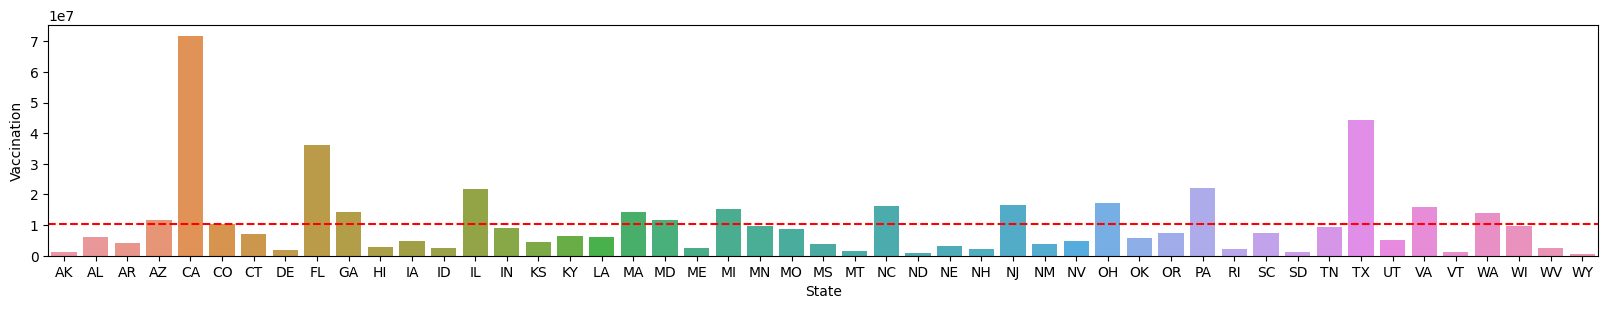

In [ ]:
yV = np.mean(vaccines_by_state['vaccines'])
plt.rcParams["figure.figsize"] = (20,3)
ax = sns.barplot(x="state_abbrev", y="vaccines", data=vaccines_by_state)
plt.axhline(y = yV, color = 'r', linestyle = 'dashed') 
plt.xlabel('State')
plt.ylabel('Vaccination')
plt.show()

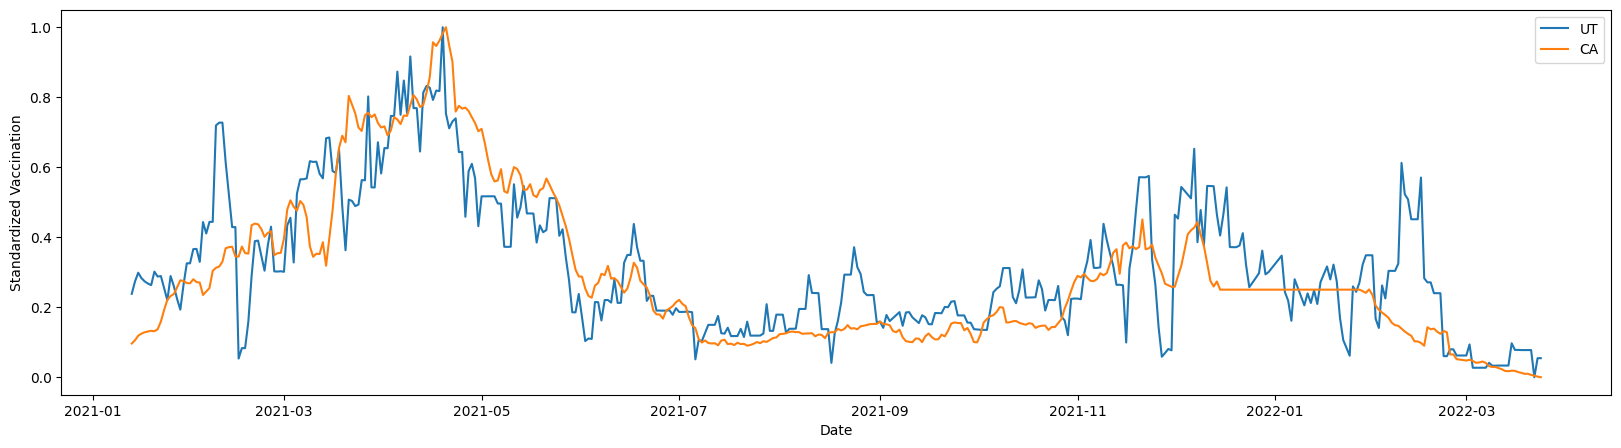

In [ ]:
ct = ColumnTransformer([
        ('somename', MinMaxScaler(), ['daily_vaccinations'])
    ], remainder='passthrough')

temp = vaccine2
vaccine2['daily_vaccinations'] = ct.fit_transform(temp)[:,0]

plt.rcParams["figure.figsize"] = (20,5)
selected_state = ['UT', 'CA']
for i in selected_state:

  vaccines_by_state = vaccine2[vaccine2['state_abbrev'] == i]
  vaccines_by_state = vaccines_by_state[['state_abbrev','date','daily_vaccinations']]
  vaccines_by_state['daily_vaccinations'] = MinMaxScaler().fit_transform(np.array(vaccines_by_state['daily_vaccinations']).reshape(-1,1))
  plt.plot(vaccines_by_state['date'],vaccines_by_state['daily_vaccinations'], label=i)
plt.xlabel('Date')
plt.ylabel('Standardized Vaccination')
plt.legend()
plt.show()

## **Covid Cases, Deaths and Vaccination over time for some states**

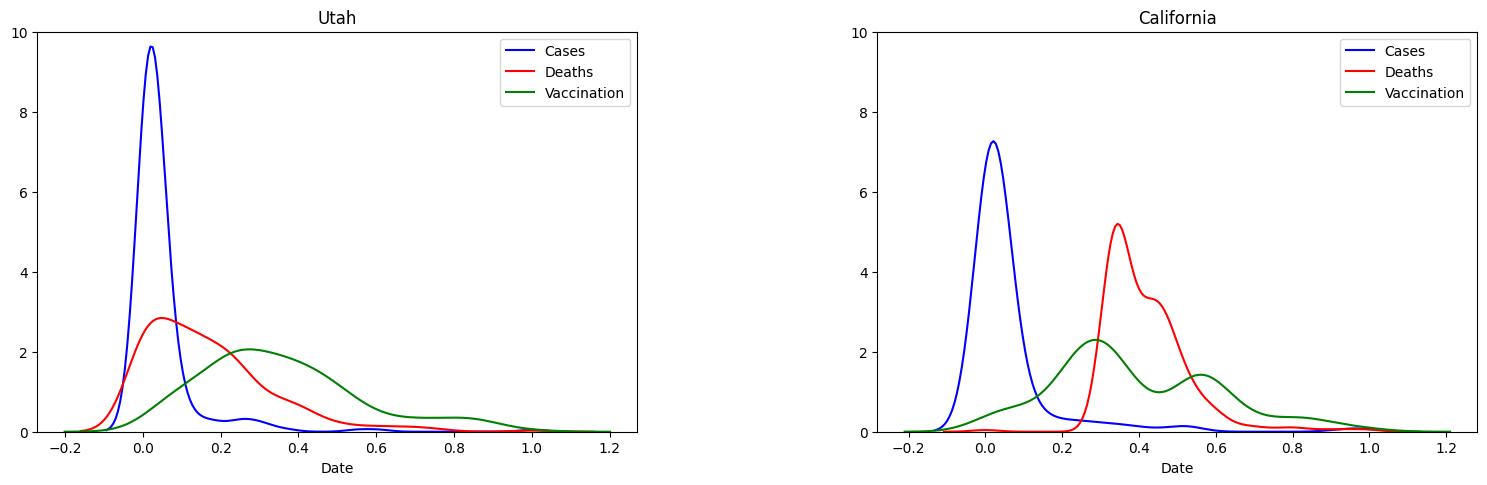

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))
fig.tight_layout()

ax = plt.subplot(1,2,1)
Case = df[(df['state'] == 'UT') & (df['submission_date'] >= '2021-07-01')]
Case = Case[['submission_date', 'new_case', 'new_death']]
Case[['new_case']] = scaler.fit_transform(Case[['new_case']])
Case[['new_death']] = scaler.fit_transform(Case[['new_death']])

Vaccine = vaccine[(vaccine['location'] == 'Utah') & (vaccine['date'] >= '2021-07-01')]
Vaccine = Vaccine[['date','location','daily_vaccinations']]
Vaccine = Vaccine.dropna()
Vaccine[['daily_vaccinations']] = scaler.fit_transform(Vaccine[['daily_vaccinations']])

sns.distplot(Case.new_case, hist=False, label='Cases', color="blue")
sns.distplot(Case.new_death, hist=False, label='Deaths', color="red")
sns.distplot(Vaccine.daily_vaccinations, hist=False, label='Vaccination', color="green")
plt.legend()

plt.xlabel('Date')
plt.ylabel('')
plt.ylim([0, 10])
plt.title('Utah')


ax = plt.subplot(1,2,2)
Case = df[(df['state'] == 'CA') & (df['submission_date'] >= '2021-07-01')]
Case = Case[['submission_date', 'new_case', 'new_death']]
Case[['new_case']] = scaler.fit_transform(Case[['new_case']])
Case[['new_death']] = scaler.fit_transform(Case[['new_death']])

Vaccine = vaccine[(vaccine['location'] == 'California') & (vaccine['date'] >= '2021-07-01')]
Vaccine = Vaccine[['date','location','daily_vaccinations']]
Vaccine = Vaccine.dropna()
Vaccine[['daily_vaccinations']] = scaler.fit_transform(Vaccine[['daily_vaccinations']])

sns.distplot(Case.new_case, hist=False, label='Cases', color="blue")
sns.distplot(Case.new_death, hist=False, label='Deaths', color="red")
sns.distplot(Vaccine.daily_vaccinations, hist=False, label='Vaccination', color="green")
plt.legend()

plt.xlabel('Date')
plt.ylabel('')
plt.ylim([0, 10])
plt.title('California')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()